In [1]:
from torch.utils.data import Dataset
import torch
import numpy as np
import h5py
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline


import sys, re
sys.path.append('/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/')

import torch
import json
from torch.utils.data import DataLoader
import os

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "colab"


def plot3D_4x(P, TITLES):

    fig = make_subplots(
        rows=1, cols=4,
        specs=[[{'type': 'surface'},{'type': 'surface'},{'type': 'surface'},{'type': 'surface'}]],
        subplot_titles=TITLES)# , subplot_titles=(titles))
    
    omega = 1
    q = 41
    
    fig.add_trace(
    go.Surface(z=P[0], colorscale='viridis', showscale=False),
    row=1, col=1)
    
    fig.add_trace(
    go.Surface(z=P[1], colorscale='viridis', showscale=False),
    row=1, col=2)
    
    fig.add_trace(
    go.Surface(z=P[2], colorscale='viridis', showscale=False),
    row=1, col=3)
    
    fig.add_trace(
    go.Surface(z=P[3], colorscale='viridis', showscale=False),
    row=1, col=4)
    
    fig.update_scenes(xaxis_title_text='ek',  
                      yaxis_title_text='vk')
        
    camera = dict(
        eye=dict(x=2, y=1.5, z=1.)
    )
    aspectratio = dict(x=1, y=1., z=1.5)
    
        
    fig.layout.scene1.camera = camera
    fig.layout.scene2.camera = camera
    fig.layout.scene3.camera = camera
    fig.layout.scene4.camera = camera
    fig.layout.scene1.aspectratio=aspectratio
    fig.layout.scene2.aspectratio=aspectratio
    fig.layout.scene3.aspectratio=aspectratio
    fig.layout.scene4.aspectratio=aspectratio
    
    fig.update_layout(
        scene1 = dict(zaxis = dict(nticks=4),),
        scene2 = dict(zaxis = dict(nticks=4),),
        scene3 = dict(zaxis = dict(nticks=4),),
        scene4 = dict(zaxis = dict(nticks=4),),
        title=r'',
        autosize=True,
        width=1800, height=600,
        margin=dict(l=10, r=5, b=0, t=35))
    
    fig.show()


from torch.utils.data import Dataset
import torch
import numpy as np
import h5py
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline


import sys, re
sys.path.append('/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/')

import torch
import json
from torch.utils.data import DataLoader
import os

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "colab"


def plot3D_1x(P, TITLES):

    fig = make_subplots(
        rows=1, cols=1,
        specs=[[{'type': 'surface'}]],
        subplot_titles=TITLES)# , subplot_titles=(titles))
    
    
    fig.add_trace(
    go.Surface(z=P[0], colorscale='viridis', showscale=False),
    row=1, col=1)
    
    fig.update_scenes(xaxis_title_text='ek',  
                      yaxis_title_text='vk')
        
    camera = dict(
        eye=dict(x=2, y=1.5, z=1.)
    )
    aspectratio = dict(x=1, y=1., z=1.5)
    
        
    fig.layout.scene1.camera = camera
    fig.layout.scene1.aspectratio=aspectratio
    
    fig.update_layout(
        scene1 = dict(zaxis = dict(nticks=4),),
        title=r'',
        autosize=True,
        width=600, height=600,
        margin=dict(l=10, r=5, b=0, t=35))
    
    fig.show()



In [2]:
from scipy.optimize import curve_fit

def fit_ImSigma_2(iw, gamma, alpha, beta):
    ImSigma = -gamma - alpha * iw - beta * iw**2
    return ImSigma

def fit_ImSigma_1(iw, gamma, alpha):
    ImSigma = gamma - alpha * iw
    return ImSigma
    

def create_datasets(config):
    
    PATH = config["PATH_TRAIN"]

    # f = h5py.File(PATH, 'r')
    # data = np.array(f["train"]['data'][:1000])
    # print("************************************")
    # print("Size of dataset: ", data.shape)
    # print("************************************")
    # train, validation = torch.utils.data.random_split(data, [int(data.__len__()*0.8), int(data.__len__())-int(data.__len__()*0.8)], generator=torch.Generator().manual_seed(42))

    PATH = config["PATH_TRAIN"]
    f = h5py.File(PATH, 'r')
    if config["TRAINDATA"]==config["VALIDATIONDATA"]:
        data = np.array(f[config["TRAINDATA"]])
        train, validation = torch.utils.data.random_split(data, [int(data.__len__()*config["SPLIT"]), int(data.__len__())-int(data.__len__()*config["SPLIT"])], generator=torch.Generator().manual_seed(42))
    else:
        train = np.array(f[config["TRAINDATA"]])
        validation = np.array(f[config["VALIDATIONDATA"]])
    
    return train, validation

def load_model_data(SAVEPATH, _MODEL):
    ep = 0
    for filename in os.listdir(SAVEPATH+"checkpoints"):
        epc = int(re.findall(r'\d+', filename)[0])
        # if epc == 0:
        #     f = os.path.join(SAVEPATH, filename)
        #     FILENAME = "checkpoints/"+filename
        if epc > ep:
            f = os.path.join(SAVEPATH, filename)
            FILENAME = "checkpoints/"+filename
            ep = epc
    config = json.load(open(SAVEPATH+'config.json'))#[_MODEL]
    print(SAVEPATH+FILENAME)
    # for k in config.keys():
    #     for kk in config[k].keys():
    #         print(k,kk, config[k][kk])
    # print(config["DATA_LOADER"])
    checkpoint = torch.load(SAVEPATH+FILENAME, map_location=torch.device('cuda'))
    print(" Checkpoint loaded...")
    
    ''' Model setup '''
    wrapers = __import__("src.wrappers.wrapers", fromlist=['object'])#.wrapers
    print(config["MODEL_WRAPER"])
    model = getattr(wrapers, config["MODEL_WRAPER"])(config)
    print(" Model loading... ")
    model.load_state_dict(checkpoint['state_dict'])
    print(" Model loaded... ")
    # p = kk
    # model = 0

    ''' Dataloading '''
    train_data, validation_data = create_datasets(config)
    train_data = np.array(train_data)
    validation_data = np.array(validation_data)
    
    ### > Single HDF5 file containing training and validation data 
    ld = __import__("load_data", fromlist=['object'])
    # data_set = load_data.Dataset_ae(config)
    train_set = getattr(ld, config["DATA_LOADER"])(config, train_data)
    validation_set = getattr(ld, config["DATA_LOADER"])(config, validation_data)

    train_dataloader = DataLoader(train_set, batch_size=1, shuffle=False)
    validation_dataloader = DataLoader(validation_set, batch_size=1, shuffle=False)
    
    # f = h5py.File(config["PATH_TRAIN"], 'r')
    # parameters = f["valid"]["parameters"]
    return model, train_set, validation_set, train_dataloader, validation_dataloader, config



In [3]:
_MODEL = "GNN_1_direct"
SAVEPATH = f"/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves_2025_02/SigmaTrans/metiso/U2c0_b30_N250000/save_{_MODEL}_BS1_2025-02-23/version_0/"
model_GNN_direct, train_set_GNN_direct, validation_set_GNN_direct, train_dataloader_GNN_direct, validation_dataloader_GNN_direct, config = load_model_data(SAVEPATH, _MODEL)
# model.model.eval()

print("...loading done.")

/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves_2025_02/SigmaTrans/metiso/U2c0_b30_N250000/save_GNN_1_direct_BS1_2025-02-23/version_0/checkpoints/epoch=19-step=2476080.ckpt
 Checkpoint loaded...
model_wraper_gnn
 Model loading... 
 Model loaded... 
...loading done.


In [4]:
_MODEL = "GNN_1_trainbase"
SAVEPATH = f"/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves_2025_02/SigmaTrans/metiso/U2c0_b30_N250000/save_{_MODEL}_BS1_2025-02-23/version_0/"
model_GNN_trainbase, train_set_GNN_trainbase, validation_set_GNN_trainbase, train_dataloader_GNN_trainbase, validation_dataloader_GNN_trainbase, config = load_model_data(SAVEPATH, _MODEL)

print("...loading done.")

/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves_2025_02/SigmaTrans/metiso/U2c0_b30_N250000/save_GNN_1_trainbase_BS1_2025-02-23/version_0/checkpoints/epoch=14-step=1857060.ckpt
 Checkpoint loaded...
model_wraper_gnn
 Model loading... 
 Model loaded... 
...loading done.


In [5]:
SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/Herbert/SigmaTrans/AD_x2/U2c0_b30_N250000/save_auto_encoder_AD_BS10_2025-02-24/version_0/"
# SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/GTrans/metiso/U2c0_b30_N250000/save_GNN_basis_2_BS20_2024-08-16/version_0/"
model_AD, train_set_AD, validation_set_AD, train_dataloader_AD, validation_dataloader_AD, config = load_model_data(SAVEPATH, 0)
model_AD.model.eval()

print("...loading done.")

/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/Herbert/SigmaTrans/AD_x2/U2c0_b30_N250000/save_auto_encoder_AD_BS10_2025-02-24/version_0/checkpoints/epoch=299-step=3714300.ckpt
 Checkpoint loaded...
model_wraper_generic_AD
 Model loading... 
 Model loaded... 
...loading done.


In [6]:
SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/Herbert/SigmaTrans/AE/U2c0_b30_N250000/save_auto_encoder_BS10_2025-01-07/version_0/"
# SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/GTrans/metiso/U2c0_b30_N250000/save_GNN_basis_2_BS20_2024-08-16/version_0/"
model_AE, train_set_AE, validation_set_AE, train_dataloader_AE, validation_dataloader_AE, config = load_model_data(SAVEPATH, 0)
model_AE.model.eval()

print("...loading done.")

/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/Herbert/SigmaTrans/AE/U2c0_b30_N250000/save_auto_encoder_BS10_2025-01-07/version_0/checkpoints/epoch=214-step=2661915.ckpt
 Checkpoint loaded...
model_wraper_generic
 Model loading... 
 Model loaded... 
...loading done.


In [7]:
# print(train_set_AE[0][0].shape)
# # print(train_set_GNN_trainbase)
# print(train_set_GNN_trainbase[0]["target"])



In [8]:
interesting_samples = [963, 1505]
random_sample = interesting_samples[0]

In [9]:
random_sample = int(np.random.rand()*len(validation_set_GNN_trainbase))
# random_sample = int(np.random.rand()*len(train_set_GNN_trainbase))
print(random_sample)

1401


In [10]:
graph_sample = {}
graph_sample["node_feature"] = validation_set_GNN_trainbase[random_sample]["node_feature"][None]
graph_sample["edge_index"] = validation_set_GNN_trainbase[random_sample]["edge_index"][None]
graph_sample["vectors"] = validation_set_GNN_trainbase[random_sample]["vectors"][None]
graph_sample["target"] = validation_set_GNN_trainbase[random_sample]["target"][None]

# graph_sample = {}
# graph_sample["node_feature"] = train_set_GNN_trainbase[random_sample]["node_feature"][None]
# graph_sample["edge_index"] = train_set_GNN_trainbase[random_sample]["edge_index"][None]
# graph_sample["vectors"] = train_set_GNN_trainbase[random_sample]["vectors"][None]
# graph_sample["target"] = train_set_GNN_trainbase[random_sample]["target"][None]

AD_sample = validation_set_AD[random_sample][0][None,None]
AE_sample = validation_set_AE[random_sample][0][None,None]

input_G = validation_set_AE[random_sample][0]
target_Sigma = validation_set_AE[random_sample][1]

In [11]:
pred_GNN_trainbase = model_GNN_trainbase.model(graph_sample).detach().numpy()
pred_GNN_direct = model_GNN_direct.model(graph_sample).detach().numpy()
pred_AD = model_AD.valid_(AD_sample, 0).detach().numpy()
pred_AE = model_AE(AE_sample).detach().numpy()

emb_vec = model_GNN_trainbase.model.vec_embedding_mlp(graph_sample["vectors"][0]).detach().numpy()


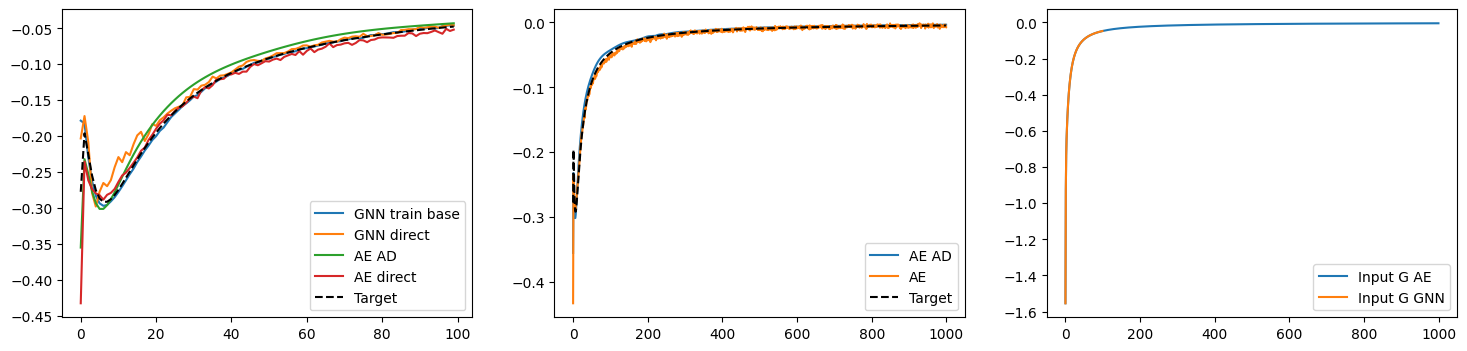

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fign = 0
ax[fign].plot(pred_GNN_trainbase[0,:], label="GNN train base")
ax[fign].plot(pred_GNN_direct[0,:], label="GNN direct")
ax[fign].plot(pred_AD[0,1000:1100], label="AE AD")
ax[fign].plot(pred_AE[0,0,:100], label="AE direct")
ax[fign].plot(target_Sigma[:100], "--", color="black", label="Target")
# ax[fign].plot(graph_sample["target"][0], "--")
ax[fign].legend()

fign = 1
ax[fign].plot(pred_AD[0,1000:], label="AE AD")
ax[fign].plot(pred_AE[0,0,:], label="AE")
ax[fign].plot(target_Sigma[:], "--", color="black", label="Target")
ax[fign].legend()

fign = 2
ax[fign].plot(input_G, label="Input G AE")
ax[fign].plot(graph_sample["node_feature"][0,0,100:], label="Input G GNN")
ax[fign].legend()


In [13]:
GNN_trainbase_data_ST = np.load("GNN_1_trainbase_BS1_2025-02-23_v0_ST.npy")
AE_AD_data_ST = np.load("auto_encoder_AD_BS10_2025-02-24_v0_ST.npy")
AE_AD_data_GT = np.load("auto_encoder_AD_BS10_2025-02-23_v0_GT.npy")
AE_data_ST = np.load("auto_encoder_BS10_2025-01-07_v0_ST.npy")
AE_data_GT = np.load("auto_encoder_BS10_2024-12-16_v0_GT.npy")


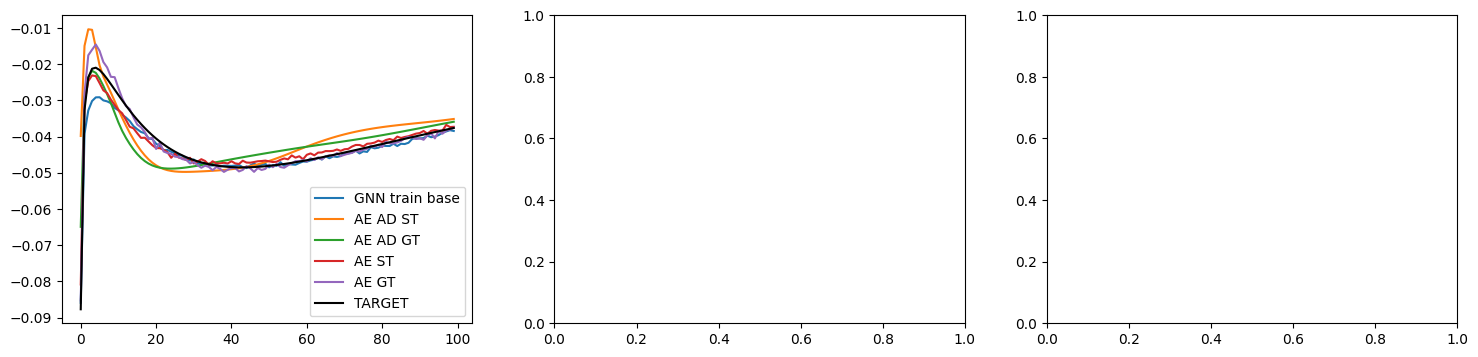

In [14]:
n = 120
m = 143
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fign = 0
ax[fign].plot(GNN_trainbase_data_ST[n,m,2,:].real, label="GNN train base")
ax[fign].plot(AE_AD_data_ST[n,m,2,1000:1100].real, label="AE AD ST")
ax[fign].plot(AE_AD_data_GT[n,m,2,1000:1100].real, label="AE AD GT")
ax[fign].plot(AE_data_ST[n,m,2,:100].real, label="AE ST")
ax[fign].plot(AE_data_GT[n,m,2,:100].real, label="AE GT")
ax[fign].plot(GNN_trainbase_data_ST[n,m,1,:].imag, color="black",  label="TARGET")
# ax[fign].plot(AE_AD_data_ST[n,m,1,1000:1100].real, color="black",  label="TARGET")
# ax[fign].plot(AE_data_ST[n,m,1,1000:1100].real, color="black",  label="TARGET")
ax[fign].legend()



In [15]:
# ivmax = 100
# loss = torch.nn.MSELoss()
# mse_loss_AE_AD_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# mse_loss_AE_AD_GT = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# mse_loss_AE_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# mse_loss_AE_GT = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# mse_loss_GNN_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))

# for n in range(0,mse_loss_AE_AD_ST.shape[0]):
#     if n%100==0: print(n)
#     for m in range(0,mse_loss_AE_AD_ST.shape[1]):
#         mse_loss_AE_AD_ST[n,m] = loss(torch.tensor(AE_AD_data_ST[n,m,1,1000:1000+ivmax].real), torch.tensor(AE_AD_data_ST[n,m,2,1000:1000+ivmax].real))
#         mse_loss_AE_AD_GT[n,m] = loss(torch.tensor(AE_AD_data_GT[n,m,1,1000:1000+ivmax].real), torch.tensor(AE_AD_data_GT[n,m,2,1000:1000+ivmax].real))
#         mse_loss_AE_ST[n,m] = loss(torch.tensor(AE_data_ST[n,m,1,:ivmax].imag), torch.tensor(AE_data_ST[n,m,2,:ivmax].real))
#         mse_loss_AE_GT[n,m] = loss(torch.tensor(AE_data_GT[n,m,1,:ivmax].imag), torch.tensor(AE_data_ST[n,m,2,:ivmax].real))
#         mse_loss_GNN_ST[n,m] = loss(torch.tensor(GNN_trainbase_data_ST[n,m,1,:ivmax].imag), torch.tensor(GNN_trainbase_data_ST[n,m,2,:ivmax].real))

        

In [16]:
# n = np.linspace(0,999,1000)
# iv = (2*n+1)/30*np.pi
# mx = 5

# Z_loss_AE_data_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# gamma_loss_AE_data_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# Z_loss_AE_AD_data_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# gamma_loss_AE_AD_data_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# Z_loss_GNN_trainbase_data_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))
# gamma_loss_GNN_trainbase_data_ST = torch.zeros((AE_data_GT.shape[0], AE_data_GT.shape[1]))


# for n in range(0,AE_data_GT.shape[0]):
#     if n%100==0: print(n)
#     for m in range(0,AE_data_GT.shape[1]):
#         ta2, _ = curve_fit(fit_ImSigma_2, iv[:mx], AE_AD_data_ST[n,m,1,1000:1000+mx].real)
#         pe2, _ = curve_fit(fit_ImSigma_2, iv[:mx], AE_AD_data_ST[n,m,2,1000:1000+mx].real)
#         gamma_loss_AE_AD_data_ST[n,m] = loss(torch.tensor(ta2[0]), torch.tensor(pe2[0]))
#         Z_loss_AE_AD_data_ST[n,m] = loss(torch.tensor(ta2[1]), torch.tensor(pe2[1]))

#         ta2, _ = curve_fit(fit_ImSigma_2, iv[:mx], GNN_trainbase_data_ST[n,m,1,:mx].imag)
#         pe2, _ = curve_fit(fit_ImSigma_2, iv[:mx], GNN_trainbase_data_ST[n,m,2,:mx])
#         gamma_loss_GNN_trainbase_data_ST[n,m] = loss(torch.tensor(ta2[0]), torch.tensor(pe2[0]))
#         Z_loss_GNN_trainbase_data_ST[n,m] = loss(torch.tensor(ta2[1]), torch.tensor(pe2[1]))

#         ta2, _ = curve_fit(fit_ImSigma_2, iv[:mx], AE_data_ST[n,m,1,:mx].imag)
#         pe2, _ = curve_fit(fit_ImSigma_2, iv[:mx], AE_data_ST[n,m,2,:mx])
#         gamma_loss_AE_data_ST[n,m] = loss(torch.tensor(ta2[0]), torch.tensor(pe2[0]))
#         Z_loss_AE_data_ST[n,m] = loss(torch.tensor(ta2[1]), torch.tensor(pe2[1]))


In [17]:
# loss_GNN_ST = {}
# loss_AE_AD_ST = {}
# loss_AE_ST = {}

# loss_GNN_ST["MSEloss"] = mse_loss_GNN_ST
# loss_GNN_ST["Zloss"] = Z_loss_GNN_trainbase_data_ST
# loss_GNN_ST["Gammaloss"] = gamma_loss_GNN_trainbase_data_ST

# loss_AE_AD_ST["MSEloss"] = mse_loss_AE_AD_ST
# loss_AE_AD_ST["Zloss"] = Z_loss_AE_AD_data_ST
# loss_AE_AD_ST["Gammaloss"] = gamma_loss_AE_AD_data_ST

# loss_AE_ST["MSEloss"] = mse_loss_AE_ST
# loss_AE_ST["Zloss"] = Z_loss_AE_data_ST
# loss_AE_ST["Gammaloss"] = gamma_loss_AE_data_ST

# import h5py

# f = h5py.File("Loss_GNN_ST.hdf5", "w")
# for k in loss_GNN_ST.keys():
#     dset = f.create_dataset(k, data=loss_GNN_ST[k])
# f.close()

# f = h5py.File("Loss_AE_AD_ST.hdf5", "w")
# for k in loss_GNN_ST.keys():
#     dset = f.create_dataset(k, data=loss_AE_AD_ST[k])
# f.close()

# f = h5py.File("Loss_AE_ST.hdf5", "w")
# for k in loss_GNN_ST.keys():
#     dset = f.create_dataset(k, data=loss_AE_ST[k])
# f.close()


In [18]:
loss_GNN_ST = {}
loss_AE_AD_ST = {}
loss_AE_ST = {}

f = h5py.File("Loss_GNN_ST.hdf5", "r")
loss_GNN_ST["MSEloss"] = f["MSEloss"]
loss_GNN_ST["Zloss"] = f["Zloss"]
loss_GNN_ST["Gammaloss"] = f["Gammaloss"]

f = h5py.File("Loss_AE_AD_ST.hdf5", "r")
loss_AE_AD_ST["MSEloss"] = f["MSEloss"]
loss_AE_AD_ST["Zloss"] = f["Zloss"]
loss_AE_AD_ST["Gammaloss"] = f["Gammaloss"]

f = h5py.File("Loss_AE_ST.hdf5", "r")
loss_AE_ST["MSEloss"] = f["MSEloss"]
loss_AE_ST["Zloss"] = f["Zloss"]
loss_AE_ST["Gammaloss"] = f["Gammaloss"]

Text(0.5, 1.0, 'MSE AE')

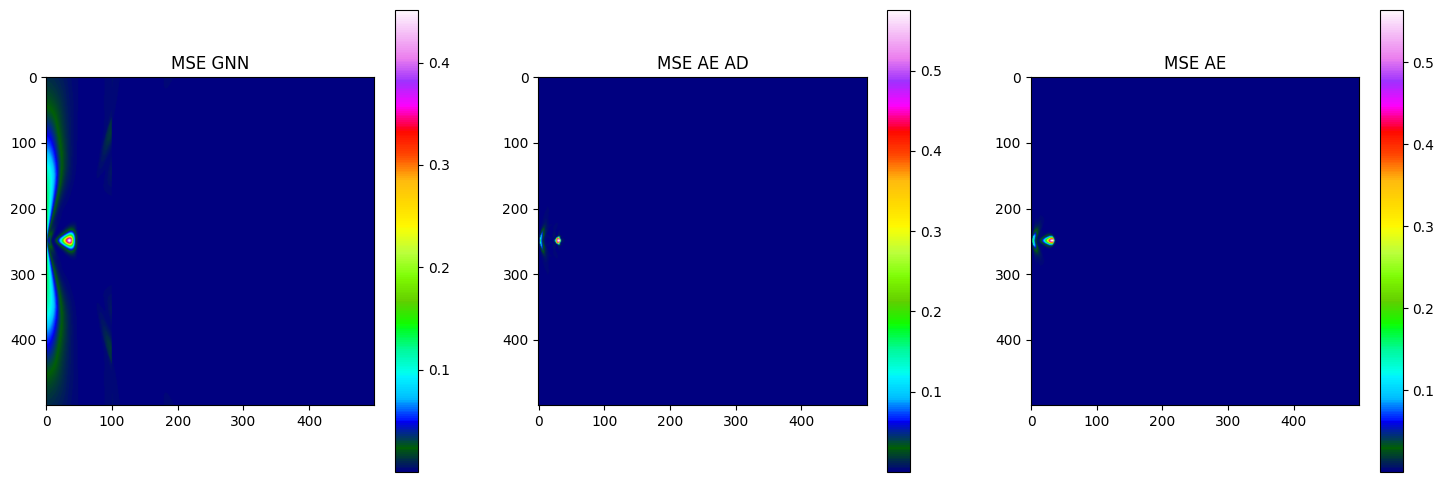

In [19]:
import matplotlib.cm as cm

fig, ax = plt.subplots(ncols=3, figsize=(18,6))
pos0 = ax[0].imshow(loss_GNN_ST["MSEloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos0, ax=ax[0])
ax[0].set_title("MSE GNN")
pos1 = ax[1].imshow(loss_AE_AD_ST["MSEloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos1, ax=ax[1])
ax[1].set_title("MSE AE AD")
pos2 = ax[2].imshow(loss_AE_ST["MSEloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos2, ax=ax[2])
ax[2].set_title("MSE AE")


Text(0.5, 1.0, 'Zloss AE')

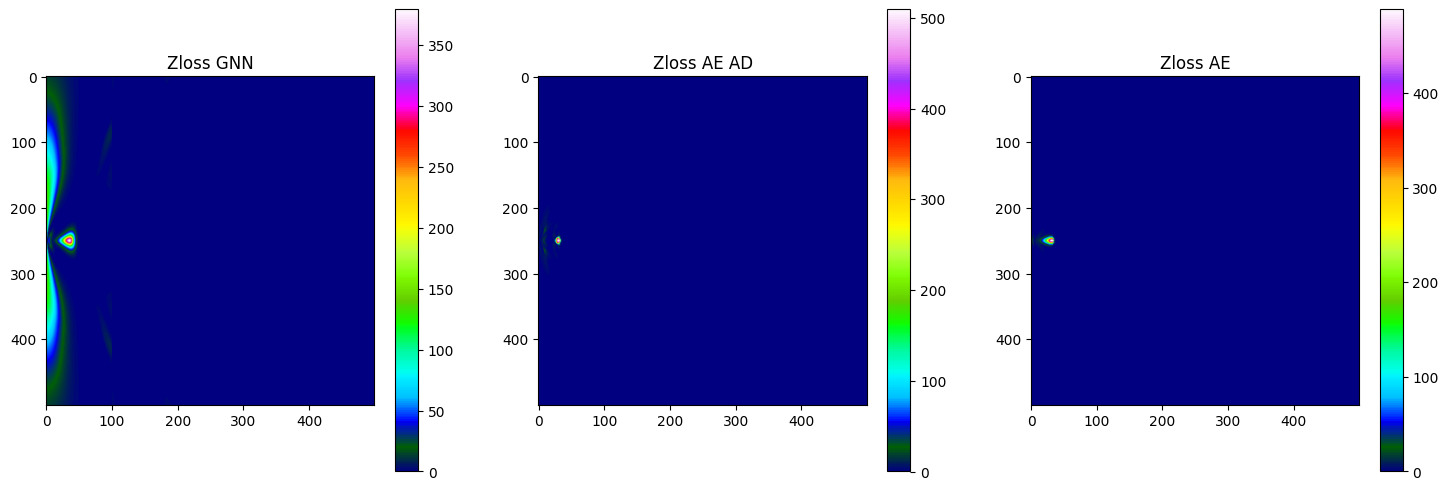

In [20]:
import matplotlib.cm as cm

fig, ax = plt.subplots(ncols=3, figsize=(18,6))
pos0 = ax[0].imshow(loss_GNN_ST["Zloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos0, ax=ax[0])
ax[0].set_title("Zloss GNN")
pos1 = ax[1].imshow(loss_AE_AD_ST["Zloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos1, ax=ax[1])
ax[1].set_title("Zloss AE AD")
pos2 = ax[2].imshow(loss_AE_ST["Zloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos2, ax=ax[2])
ax[2].set_title("Zloss AE")


Text(0.5, 1.0, 'gammaloss AE')

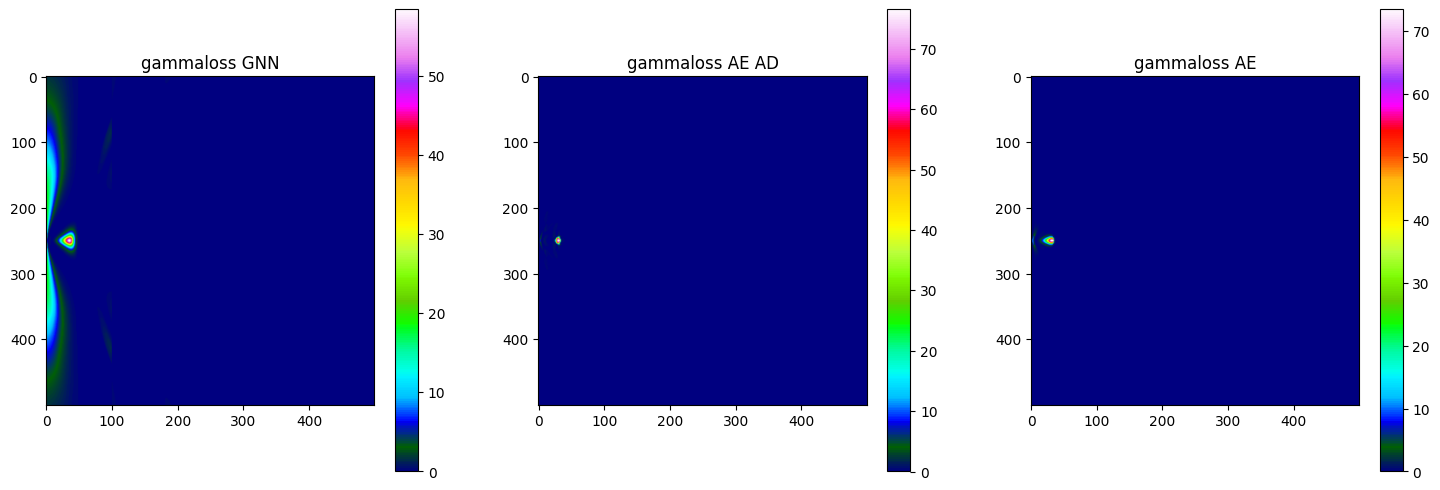

In [21]:
import matplotlib.cm as cm

fig, ax = plt.subplots(ncols=3, figsize=(18,6))
pos0 = ax[0].imshow(loss_GNN_ST["Gammaloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos0, ax=ax[0])
ax[0].set_title("gammaloss GNN")
pos1 = ax[1].imshow(loss_AE_AD_ST["Gammaloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos1, ax=ax[1])
ax[1].set_title("gammaloss AE AD")
pos2 = ax[2].imshow(loss_AE_ST["Gammaloss"][:,:], interpolation='bilinear', cmap=cm.gist_ncar)
fig.colorbar(pos2, ax=ax[2])
ax[2].set_title("gammaloss AE")


In [22]:
TITLES = ["MSE GNN", "MSE AE AD", "MSE AE", "MSE AE"]
plot3D_4x([mse_loss_GNN_ST, mse_loss_AE_AD_ST, mse_loss_AE_ST, mse_loss_AE_ST],TITLES)

NameError: name 'mse_loss_GNN_ST' is not defined

In [ ]:
TITLES = ["Z GNN", "Z AE AD", "Z AE", "Z AE"]
plot3D_4x([Z_loss_GNN_trainbase_data_ST, Z_loss_AE_AD_data_ST, Z_loss_AE_data_ST, Z_loss_AE_data_ST],TITLES)

In [ ]:
PATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/data/SigmaTrans/U2c0_b30_N250000.hdf5"
f = h5py.File(PATH, 'r')

train = np.array(f["metiso/data/30.0"])
valid = np.array(f["transprox/data/30.0"])

train_para = np.array(f["metiso/parameters/30.0"])
valid_para = np.array(f["transprox/parameters/30.0"])

# print(valid_para[1])

### Unique parameters
unique_ek = []
unique_vk = [] 
unique_beta = [] 

for n,para in enumerate(valid_para):
    if para[1] not in unique_ek:
        unique_ek.append(para[1])
    if para[2] not in unique_vk:
        unique_vk.append(para[2])
    if para[0] not in unique_beta:
        unique_beta.append(para[0])

for n,para in enumerate(train_para):
    if para[1] not in unique_ek:
        unique_ek.append(para[1])
    if para[2] not in unique_vk:
        unique_vk.append(para[2])
    if para[0] not in unique_beta:
        unique_beta.append(para[0])

unique_beta = np.array(unique_beta)
unique_ek = np.array(unique_ek)
unique_vk = np.array(unique_vk)

data = {}

for n,para in enumerate(valid_para):
    if para[1] not in data.keys():
        data[para[1]] = {}
    if para[2] not in data[para[1]].keys():
        data[para[1]][para[2]] = {}

    data[para[1]][para[2]]["input"] = torch.tensor(valid[n][0])
    data[para[1]][para[2]]["target"] = torch.tensor(valid[n][1])
    data[para[1]][para[2]]["param"] = [para[1], para[2]]
    data[para[1]][para[2]]["set"] = 1

for n,para in enumerate(train_para):
    if para[1] not in data.keys():
        data[para[1]] = {}
    if para[2] not in data[para[1]].keys():
        data[para[1]][para[2]] = {}

    data[para[1]][para[2]]["input"] = torch.tensor(train[n][0])
    data[para[1]][para[2]]["target"] = torch.tensor(train[n][1])
    data[para[1]][para[2]]["param"] = [para[1], para[2]]
    data[para[1]][para[2]]["set"] = -1

sort_ek = np.sort(unique_ek)
sort_vk = np.sort(unique_vk)

data_np = np.zeros((sort_ek.shape[0],sort_vk.shape[0],3,1000), dtype=complex)
### Herbert AD
# data_np = np.zeros((sort_ek.shape[0],sort_vk.shape[0],3,2000), dtype=complex)
para_np = np.zeros((sort_ek.shape[0],sort_vk.shape[0],2))
trainvalid = np.zeros((sort_ek.shape[0],sort_vk.shape[0]))


for n in range(0,sort_ek.shape[0]):
    if n%100==0: print(n)
    for m in range(0,sort_vk.shape[0]):
        trainvalid[n,m] = data[sort_ek[n]][sort_vk[m]]["set"]



In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(12,6))
pos0 = ax.imshow(trainvalid[:,:], interpolation='bilinear', cmap=cm.coolwarm)
fig.colorbar(pos0, ax=ax)
ax.set_title("DATA")
ax.set_xlabel(r"$\epsilon_k$")
ax.set_ylabel(r"$v_k$")


In [ ]:
# TITLES = ["DATA"]
# plot3D_1x([trainvalid],TITLES)


In [23]:
file_path = 'hk0c125_1x1_v5.dat'
hk = np.zeros((100,100,1))
with open(file_path, 'r') as file:
    file.readline()
    for k1 in range(100):
        for k2 in range(100):    
            file.readline()
            hk[k1,k2] = file.readline().split()[0]


In [24]:
n = np.linspace(0,999,1000)
beta = 30 
iv = 1j*(2*n+1)*np.pi/beta

Text(0.5, 1.0, 'G')

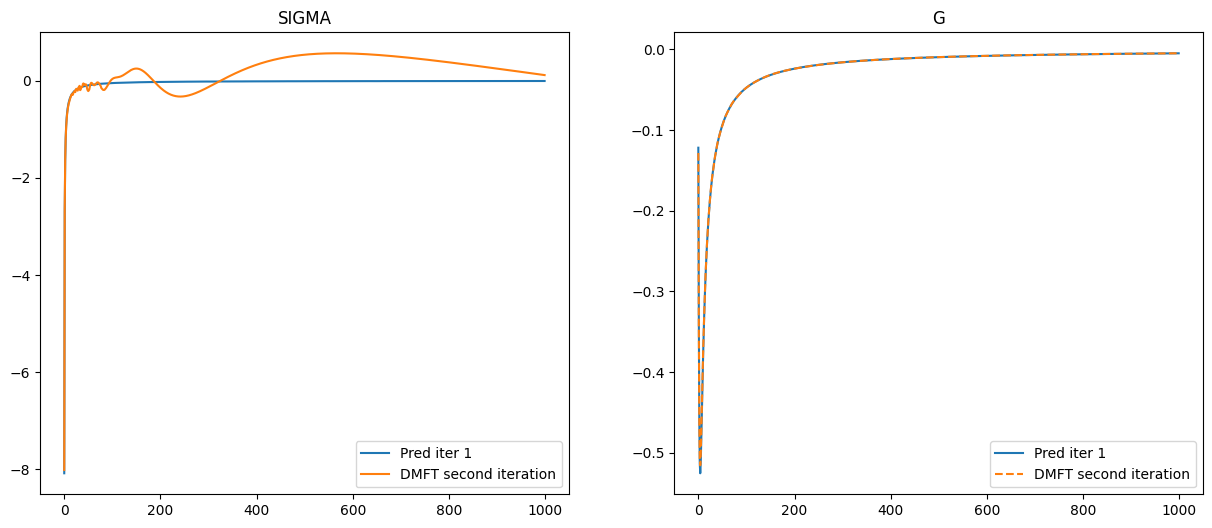

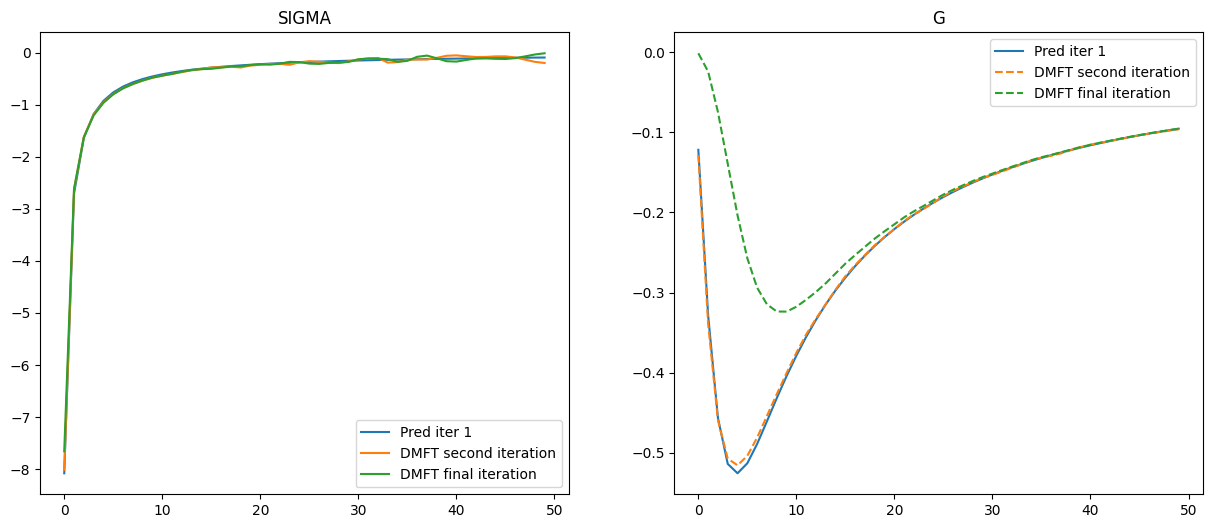

In [27]:
PATH = "/gpfs/data/fs72150/springerd/Projects/SingleBoson/Results/Benchmarks/1A_2A_final/v4/1x1/beta30/U200/oo_1-2025-02-27-Thu-10-16-21.hdf5"
f = h5py.File(PATH, "r")

giv1 = torch.tensor(f["dmft-002"]['ineq-001']["giw"]["value"][0,0,1000:].imag, dtype=torch.float32)[None,None]
giv2 = torch.tensor(f["dmft-002"]['ineq-001']["giw"]["value"][0,0,1000:].imag, dtype=torch.float32)[None,None]
givlast = torch.tensor(f["dmft-last"]['ineq-001']["giw"]["value"][0,0,1000:].imag, dtype=torch.float32)[None,None]
siv2 = f["dmft-002"]['ineq-001']["siw"]["value"][0,0,1000:].imag
pred_siv_AE = model_AE(giv1).detach().numpy()
real = np.ones_like(pred_siv_AE)

PATH = "/gpfs/data/fs72150/springerd/Projects/SingleBoson/Results/Benchmarks/1A_2A_final/v4/1x1/beta30/U200/oo_2-2025-02-27-Thu-10-54-42.hdf5"
sivfin = f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:].imag

U = 2
mu = U/2

G = 1/(iv - hk + mu - 1j*pred_AE[0,0] - f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:].real)
G_loc = np.sum(G, axis=(0,1)) / 1e4
G_test = np.sum(1/(iv - hk + mu - f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:]), axis=(0,1)) / 1e4
G_fin = np.sum(1/(iv - hk + mu - sivfin), axis=(0,1)) / 1e4

fix, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(pred_AE[0,0], label="Pred iter 1")
ax[0].plot(siv2, label="DMFT second iteration")
ax[0].legend()
ax[0].set_title("SIGMA")
ax[1].plot(G_loc.imag, label="Pred iter 1")
ax[1].plot(G_test.imag, "--", label="DMFT second iteration")
# ax[1].plot(giv2[0,0])
ax[1].legend()
ax[1].set_title("G")

mx = 50
fix, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(pred_AE[0,0,:mx], label="Pred iter 1")
ax[0].plot(siv2[:mx], label="DMFT second iteration")
ax[0].plot(sivfin[:mx], label="DMFT final iteration")
ax[0].legend()
ax[0].set_title("SIGMA")
ax[1].plot(G_loc[:mx].imag, label="Pred iter 1")
ax[1].plot(G_test[:mx].imag, "--", label="DMFT second iteration")
ax[1].plot(G_fin[:mx].imag, "--", label="DMFT final iteration")
# ax[1].plot(giv2[0,0,:100])
ax[1].legend()
ax[1].set_title("G")

In [28]:
PATH = "/gpfs/data/fs72150/springerd/Projects/SingleBoson/Results/Benchmarks/1A_2A_final/v4/1x1/beta30/U200/oo_1-2025-02-27-Thu-10-16-21.hdf5"
f = h5py.File(PATH, "r")

giv1 = f["dmft-002"]['ineq-001']["giw"]["value"][0,0,1000:]
giv2 = f["dmft-003"]['ineq-001']["giw"]["value"][0,0,1000:]
giv3 = f["dmft-004"]['ineq-001']["giw"]["value"][0,0,1000:]
siv1 = f["dmft-001"]['ineq-001']["siw"]["value"][0,0,1000:].imag
siv2 = f["dmft-002"]['ineq-001']["siw"]["value"][0,0,1000:].imag
sivlast = f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:].imag

PATH = "/gpfs/data/fs72150/springerd/Projects/SingleBoson/Results/Benchmarks/1A_2A_final/v4/1x1/beta30/U200/oo_2-2025-02-27-Thu-10-54-42.hdf5"
sivfin = f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:].imag
givfin = f["dmft-last"]['ineq-001']["giw"]["value"][0,0,1000:].imag

G_loc_all = np.zeros((100, G_loc.shape[0]), dtype=complex)
siv_all = np.zeros((100, siv1.shape[0]), dtype=complex)
G_loc = giv1
for n in range(30):
    pred_siv_AE = model_AE(torch.tensor(G_loc.imag, dtype=torch.float32)[None,None]).detach().numpy()
    real = np.ones_like(pred_siv_AE)
    G = 1/(iv - hk + mu - 1j*pred_siv_AE - f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:].real)
    G_loc = np.sum(G, axis=(0,1)) / 1e4
    G_loc_all[n] = G_loc
    siv_all[n] = pred_siv_AE
    
G_test = np.sum(1/(iv - hk + mu - f["dmft-last"]['ineq-001']["siw"]["value"][0,0,1000:]), axis=(0,1)) / 1e4


/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning:

Casting complex values to real discards the imaginary part

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0.5, 1.0, 'G')

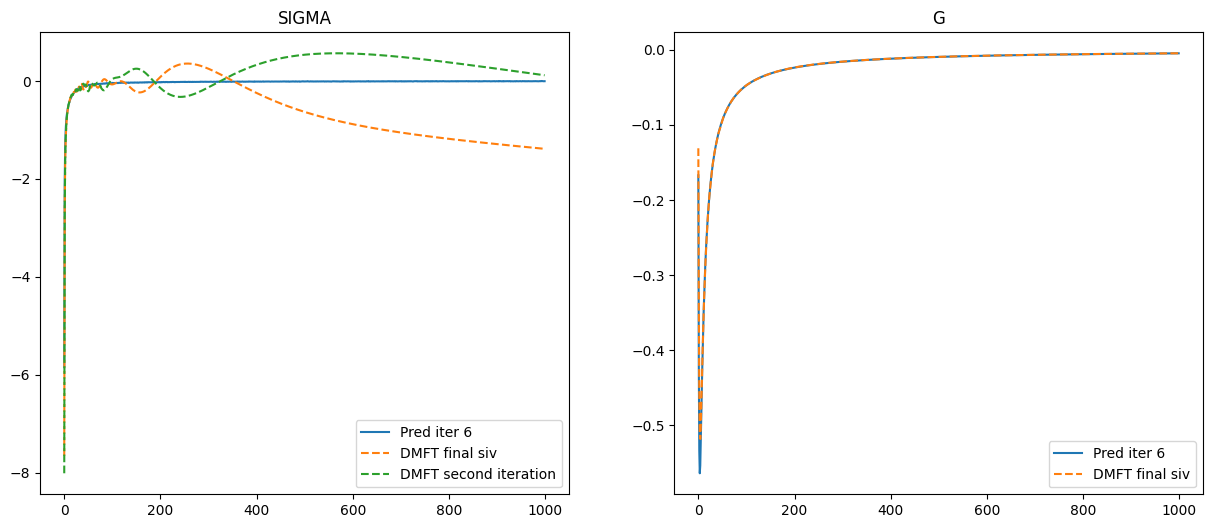

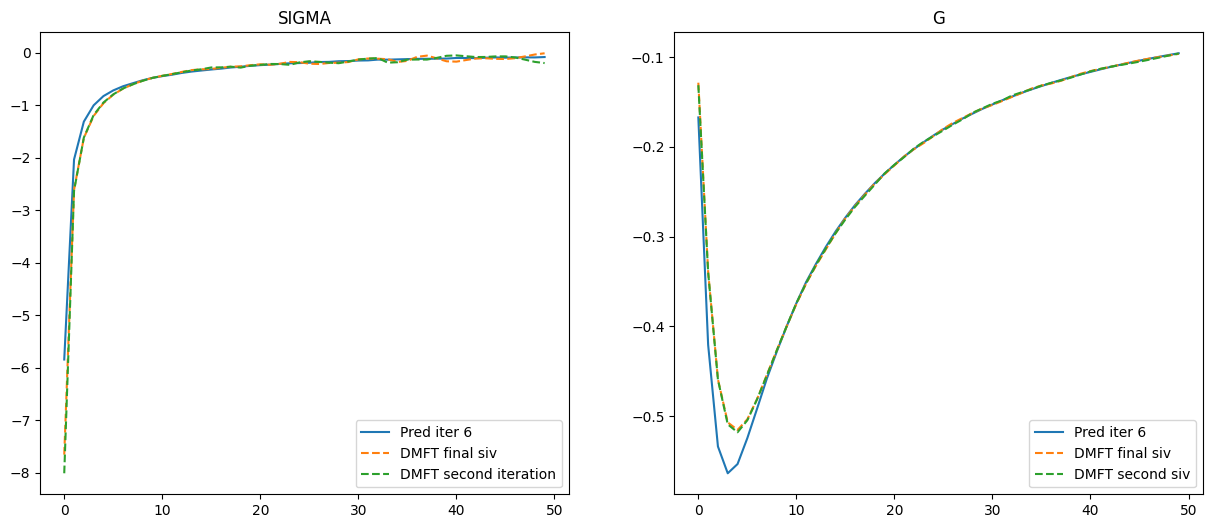

In [29]:
k = 5
fix, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(siv_all[k], label=f"Pred iter {k+1}")
ax[0].plot(sivfin, "--", label="DMFT final siv")
ax[0].plot(siv2, "--", label="DMFT second iteration")
ax[0].legend()
ax[0].set_title("SIGMA")

ax[1].plot(G_loc_all[k].imag, label=f"Pred iter {k+1}")
ax[1].plot(giv3.imag, "--", label="DMFT final siv")
# ax[1].plot(G_test.imag, "--")
ax[1].legend()
ax[1].set_title("G")


fix, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(siv_all[k,:mx], label=f"Pred iter {k+1}")
ax[0].plot(sivfin[:mx], "--", label="DMFT final siv")
ax[0].plot(siv2[:mx], "--", label="DMFT second iteration")
ax[0].legend()
ax[0].set_title("SIGMA")

ax[1].plot(G_loc_all[k,:mx].imag, label=f"Pred iter {k+1}")
ax[1].plot(givfin[:mx], "--", label="DMFT final siv")
ax[1].plot(giv3[:mx].imag, "--", label="DMFT second siv")
# ax[1].plot(G_test.imag, "--")
ax[1].legend()
ax[1].set_title("G")


In [ ]:
random_sample = int(np.random.rand()*len(validation_set))
print(random_sample)
graph_sample = {}
graph_sample["node_feature"] = validation_set[random_sample]["node_feature"][None]
graph_sample["edge_index"] = validation_set[random_sample]["edge_index"][None]
graph_sample["vectors"] = validation_set[random_sample]["vectors"][None]
graph_sample["target"] = validation_set[random_sample]["target"][None]
pred_ae_1 = model.model(graph_sample)
# emb_vec = model.model.vec_embedding_mlp(graph_sample["vectors"][0]).detach().numpy()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
# print(graph_sample["target"].shape)
# print(pred_ae_1.detach().numpy().shape)
# print(graph_sample["target"].shape)

fign = 0
ax[fign].plot(graph_sample["target"][0,:])
ax[fign].plot(pred_ae_1.detach().numpy()[0,:300])

# print(graph_sample["vectors"].shape)

fign = 1
ax[fign].plot(graph_sample["node_feature"][0,12,:])
ax[fign].plot(graph_sample["vectors"][0,0])
# ax[fign].plot(graph_sample["vectors"][0,12])
# ax[fign].plot(graph_sample["vector"][20])

# fign = 2
# ax[fign].plot(emb_vec[110,:])
# ax[fign].plot(emb_vec[221,:])
# ax[fign].plot(emb_vec[0,:])


In [ ]:
random_sample = int(np.random.rand()*len(validation_set))
print(random_sample)
graph_sample = {}
graph_sample["node_feature"] = validation_set[random_sample]["node_feature"][None]
graph_sample["edge_index"] = validation_set[random_sample]["edge_index"][None]
graph_sample["vectors"] = validation_set[random_sample]["vectors"][None]
graph_sample["target"] = validation_set[random_sample]["target"][None]
pred_ae_1 = model.model(graph_sample)
print(pred_ae_1.shape)
# emb_vec = model.model.vec_embedding_mlp(graph_sample["vectors"][0]).detach().numpy()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,4))

fign = 0
# ax[fign].plot(data_torch[0,0].detach().numpy())
fign = 1
ax[fign].plot(pred_ae_1[0].detach().numpy())
ax[fign].plot(graph_sample["target"][0])
